<a href="https://colab.research.google.com/github/c0037654Newcastle/CSC2034-DS-Project/blob/main/CSC2034_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC2034 - Data Science Project

##Google Colab Setup

In [4]:
!git clone https://github.com/c0037654Newcastle/CSC2034-DS-Project.git

Cloning into 'CSC2034-DS-Project'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), 320.52 KiB | 1.92 MiB/s, done.


In [5]:
import os
os.chdir('CSC2034-DS-Project')

##Importing the datasets
Importing the datasets for both varieties (red and white) of Portuguese Vinho Verde.

In [6]:
import pandas as pd

white_path = './data/winequality-white.csv'
red_path = './data/winequality-red.csv'

white_vihno_dataset = pd.read_csv(white_path, header = 0, sep=';')
red_vihno_dataset = pd.read_csv(red_path, header = 0, sep=';')

##Exploratory data analysis (EDA)

###1) A
*   Describe the distribution of wine quality across all samples, separately for red and white. (NEED TO DO)
*   Compare the quality distributions between reds and whites. (NEED TO DO)
*   Create suitable plots to illustrate

**NEED TO STILL DO THE FIRST TWO OBJECTIVE**


Distribution of the quality of the white vinho verde in the dataset

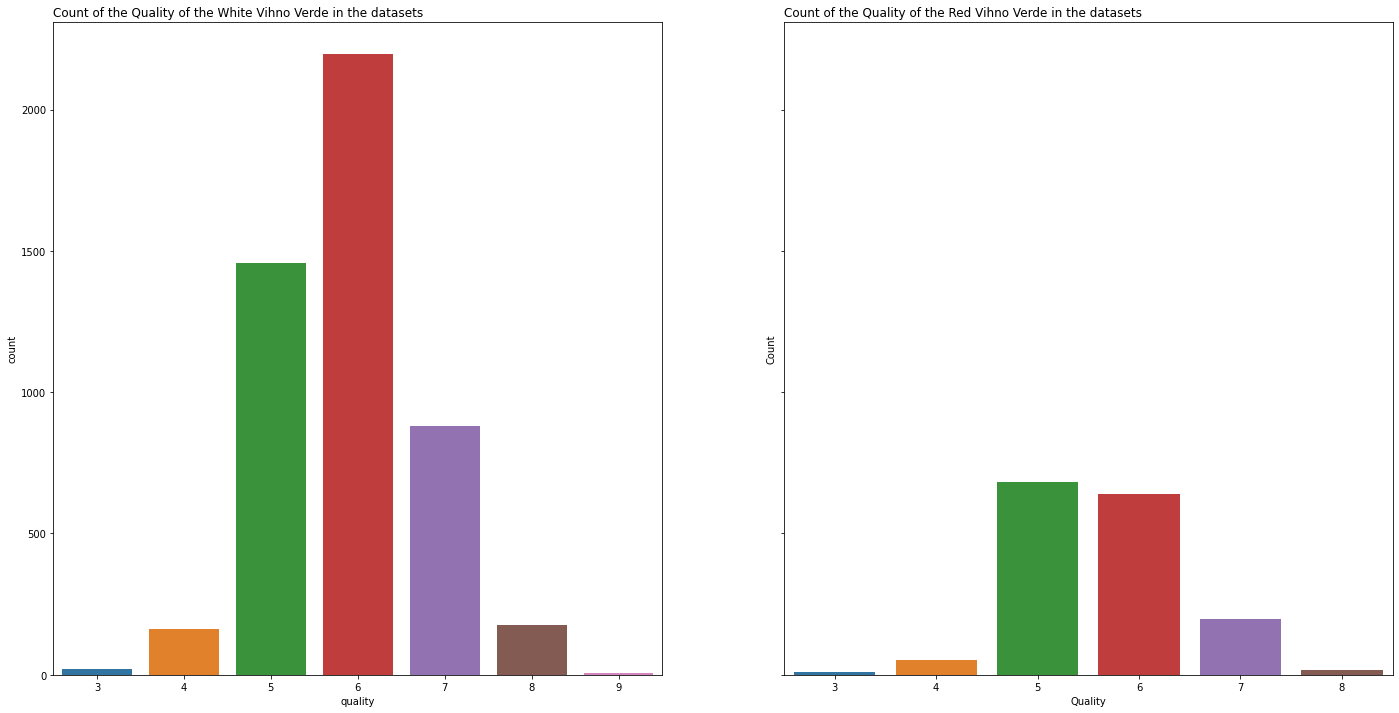

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2, sharey=True)

ax1.set_title("Count of the Quality of the White Vihno Verde in the datasets", loc='left')
ax2.set_title("Count of the Quality of the Red Vihno Verde in the datasets", loc='left')

sns.countplot(x = "quality", data = white_vihno_dataset, ax=ax1)
sns.countplot(x = "quality", data = red_vihno_dataset, ax=ax2)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.show()
plt.close()

###1) B
*   Discretise the alcohol content variables into low, mid, high based on its distribution.
*   Create a 3-valued "alcohol_cat" variable to represent this.

Finding the average and standard deviation of the red and white vinho verde datasets

In [8]:
import numpy as np

white_average = np.mean(white_vihno_dataset['alcohol'])
white_stddev = np.std(white_vihno_dataset['alcohol'])
red_average = np.mean(red_vihno_dataset['alcohol'])
red_stddev = np.std(red_vihno_dataset['alcohol'])

print('White Vihno Verde Alcohol Average',white_average)
print('White Vihno Verde Alcohol Standard Deviation',white_stddev)
print('Red Vihno Verde Alcohol Average',red_average)
print('Red Vihno Verde Alcohol Standard Deviation',red_stddev)

White Vihno Verde Alcohol Average 10.514267047774602
White Vihno Verde Alcohol Standard Deviation 1.2304949365418656
Red Vihno Verde Alcohol Average 10.422983114446529
Red Vihno Verde Alcohol Standard Deviation 1.0653343003437483


Defining the alcohol categories for the reader

In [9]:
print('White Alcohol level is less than',white_average - white_stddev, 'wine will be in the low category')
print('White Alcohol level is greater than',white_average - white_stddev, 'but less than', white_average + white_stddev, 'wine will be in the mid category')
print('White Alcohol level is greater than',white_average + white_stddev, 'wine will be in the hight category')

print()

print('Red Alcohol level is less than',red_average - red_stddev, 'wine will be in the low category')
print('Red Alcohol level is greater than',red_average - red_stddev, 'but less than', red_average + red_stddev, 'wine will be in the mid category')
print('Red Alcohol level is greater than',red_average + red_stddev, 'wine will be in the hight category')

White Alcohol level is less than 9.283772111232736 wine will be in the low category
White Alcohol level is greater than 9.283772111232736 but less than 11.744761984316469 wine will be in the mid category
White Alcohol level is greater than 11.744761984316469 wine will be in the hight category

Red Alcohol level is less than 9.357648814102781 wine will be in the low category
Red Alcohol level is greater than 9.357648814102781 but less than 11.488317414790277 wine will be in the mid category
Red Alcohol level is greater than 11.488317414790277 wine will be in the hight category


Function for categorising the alcohol level into low, mid and high based on the average and standard deviation 

In [10]:
def alcohol_category(alcohol_level, average, stddev):
  if alcohol_level < (average-stddev):
    return 'low'
  elif alcohol_level < (average + stddev):
    return 'mid'
  else:
    return 'high'

Apply the alcohol category function to red and white vihno verde datasets to create alcohol_cat column, and shows the first 5 entries of the updated dataset


In [11]:
white_vihno_dataset['alcohol_cat'] = white_vihno_dataset['alcohol'].apply(alcohol_category, args=(white_average, white_stddev,))
red_vihno_dataset['alcohol_cat'] = red_vihno_dataset['alcohol'].apply(alcohol_category, args=(red_average, red_stddev,))

print(f"List of features:\n\t{white_vihno_dataset.columns}")

print(f"\nExamining the dataset:")
display(white_vihno_dataset)

List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat'],
      dtype='object')

Examining the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,mid
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,mid
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,mid
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,mid
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,mid
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high


###1) C
*   Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content. (NEED TO DO)
*   Create suitable plots to illustrate.
*    Can you draw any conclusions on the relationship between alcohol content and quality? (NEED TO DO)



Histogram to show the cumulative value for each alcohol_cat in the White Vihno Verde dataset

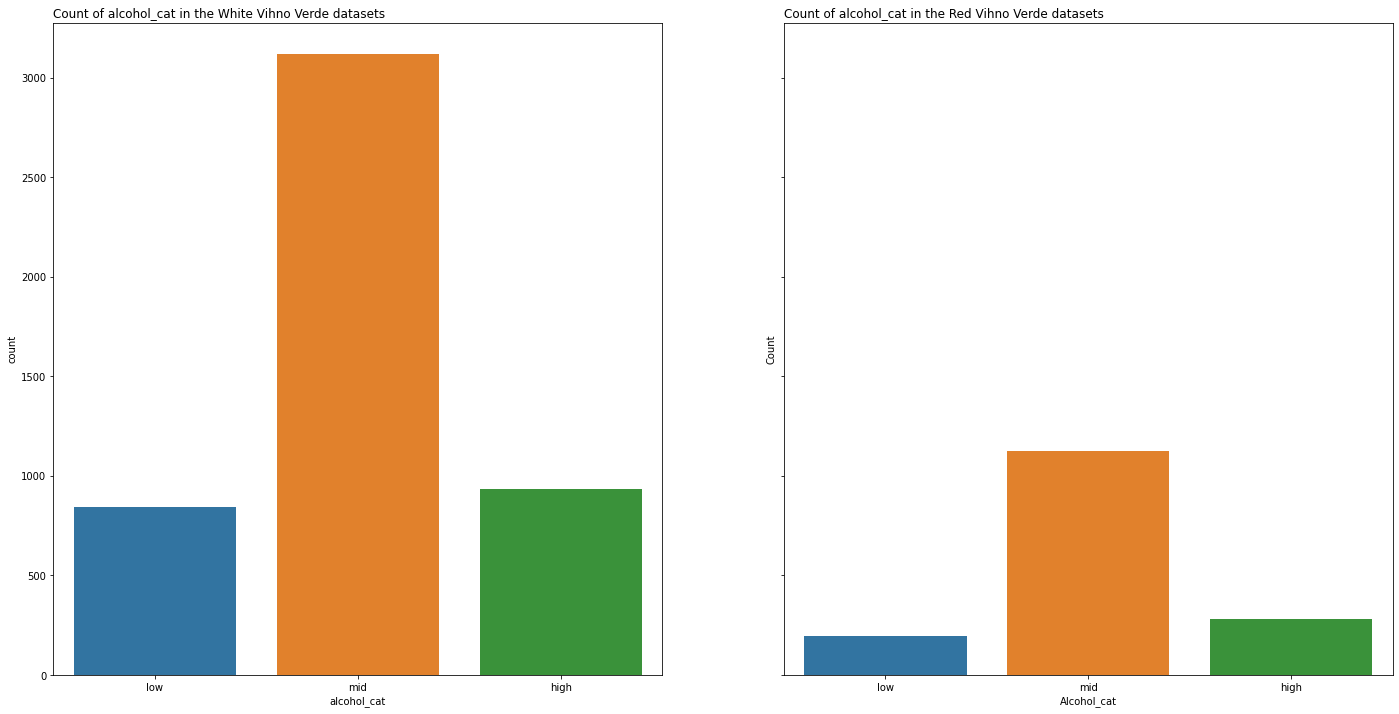

In [51]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2, sharex=True, sharey=True)

ax1.set_title("Count of alcohol_cat in the White Vihno Verde datasets", loc='left')
ax2.set_title("Count of alcohol_cat in the Red Vihno Verde datasets", loc='left')

sns.countplot(data=white_vihno_dataset, x="alcohol_cat", ax=ax1, order=['low', 'mid', 'high'])
sns.countplot(data=red_vihno_dataset, x="alcohol_cat", ax=ax2, order=['low', 'mid', 'high'])

plt.xlabel("Alcohol_cat")
plt.ylabel("Count")
plt.show()
plt.close()

Histogram to shows the number of wines at each alcohol_cat rated a certain quality. The y axis had to be log scaled to make sure each bar was shown.

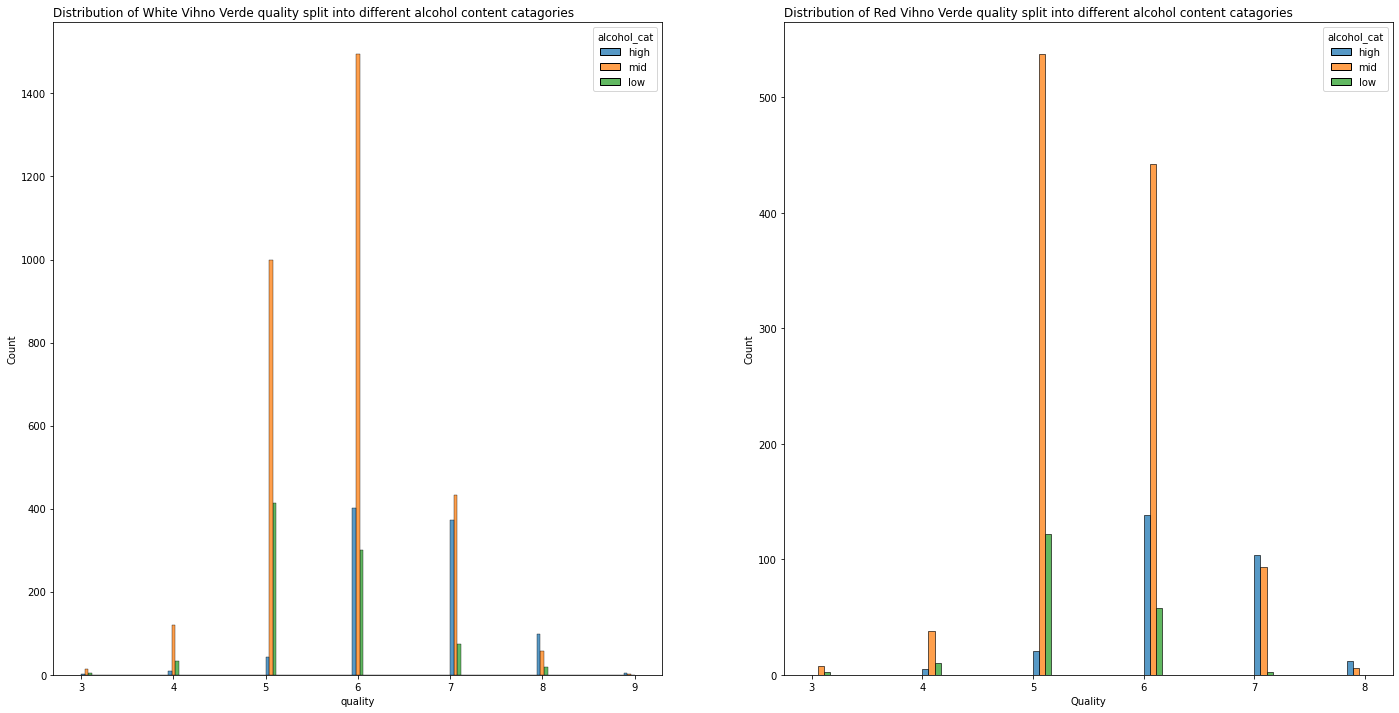

In [52]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Distribution of White Vihno Verde quality split into different alcohol content catagories", loc='left')
ax2.set_title("Distribution of Red Vihno Verde quality split into different alcohol content catagories", loc='left')

sns.histplot(data=white_vihno_dataset, x="quality", hue="alcohol_cat", multiple="dodge", ax=ax1, hue_order=['high', 'mid', 'low'])
sns.histplot(data=red_vihno_dataset, x="quality", hue="alcohol_cat", multiple="dodge", ax=ax2, hue_order=['high', 'mid', 'low'])

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

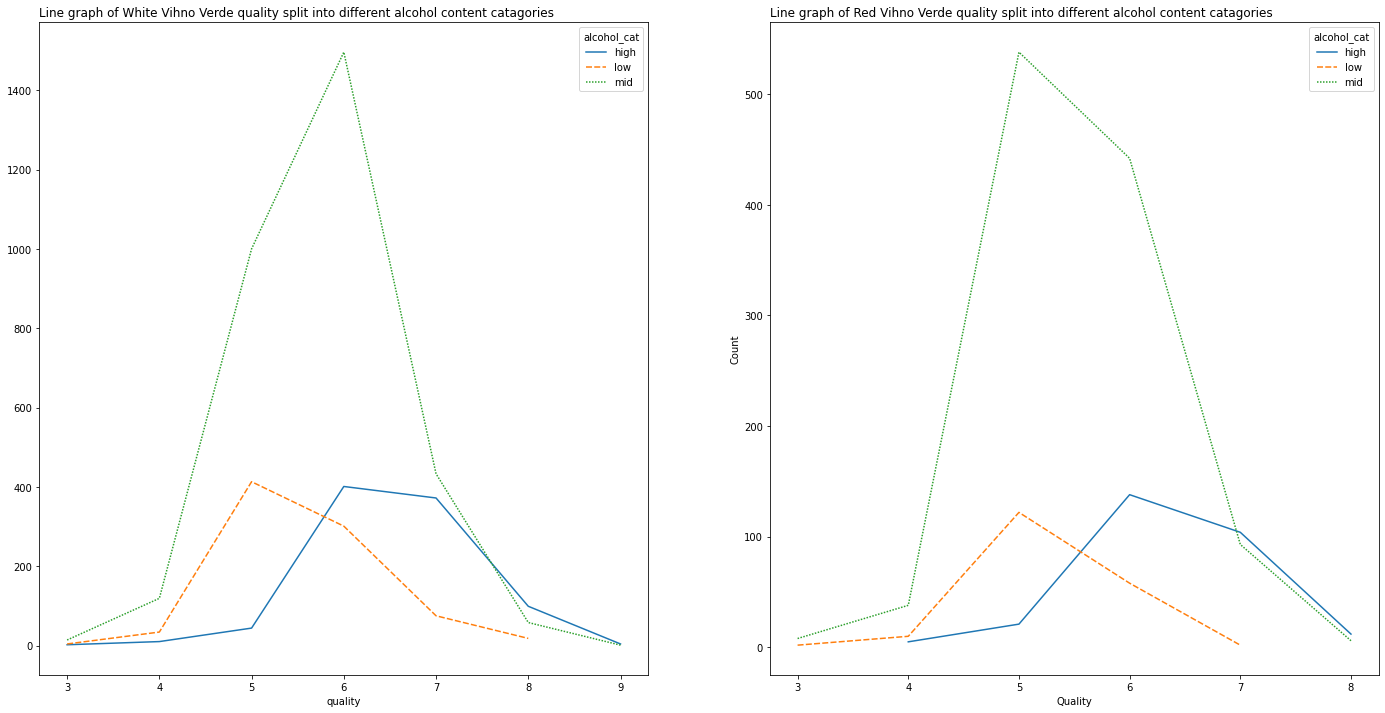

In [53]:
white_sub_dataset = white_vihno_dataset.pivot_table(index='quality', columns='alcohol_cat', values='alcohol', aggfunc='count')
red_sub_dataset = red_vihno_dataset.pivot_table(index='quality', columns='alcohol_cat', values='alcohol', aggfunc='count')

fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Line graph of White Vihno Verde quality split into different alcohol content catagories", loc='left')
ax2.set_title("Line graph of Red Vihno Verde quality split into different alcohol content catagories", loc='left')

sns.lineplot(data=white_sub_dataset, ax=ax1)
sns.lineplot(data=red_sub_dataset, ax=ax2)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

### 1) D


*   Plot the residual sugar variable and identify a suitable threshold (such that each class has approximately the same number of records) to separate "sweet" from "dry" wines
*   Create a new "isSweet" binary variable to represent these two classes




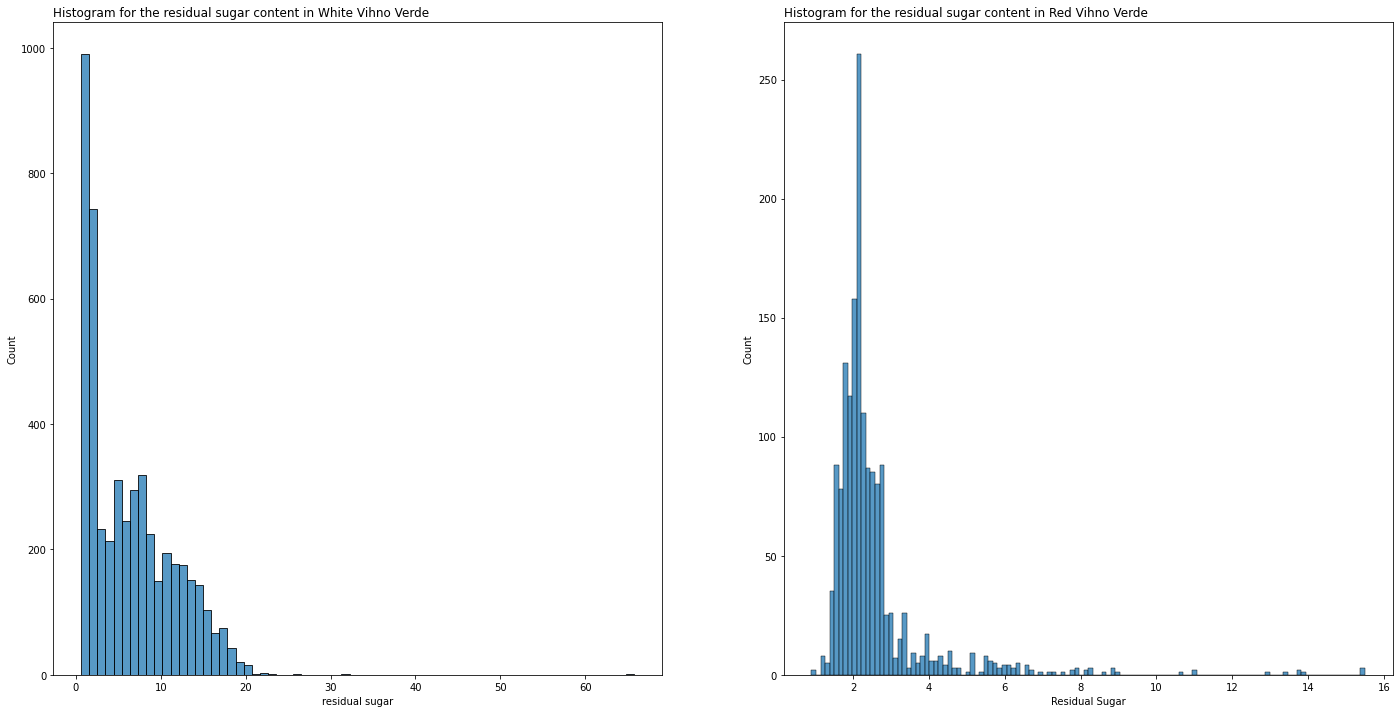

In [48]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Histogram for the residual sugar content in White Vihno Verde", loc='left')
ax2.set_title("Histogram for the residual sugar content in Red Vihno Verde", loc='left')


sns.histplot(data=white_vihno_dataset, x="residual sugar", ax=ax1)
sns.histplot(data=red_vihno_dataset, x="residual sugar", ax=ax2)


plt.xlabel("Residual Sugar")
plt.show()
plt.close()

*   White Vihno Verde with above 5.25g/L of residual sugar is considered sweet

*   Red Vihno Verde with above 2.2g/L of residual sugar is considered sweet

In [16]:
def sweetness(sweet_level, boundary):
  if sweet_level < boundary:
    return 'dry'
  else:
    return 'sweet'

In [17]:
white_vihno_dataset['isSweet'] = white_vihno_dataset['residual sugar'].apply(sweetness, args=(5.25,))
red_vihno_dataset['isSweet'] = red_vihno_dataset['residual sugar'].apply(sweetness, args=(2.2,))

print(f"\nExamining the dataset:")
display(white_vihno_dataset)


Examining the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low,sweet
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,mid,dry
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,mid,sweet
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid,sweet
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,mid,sweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,mid,dry
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,mid,sweet
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,mid,dry
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,dry


Used a bar graph to show the summation of the dry and sweet catagorised wines for both the white a red vihno verde datasets

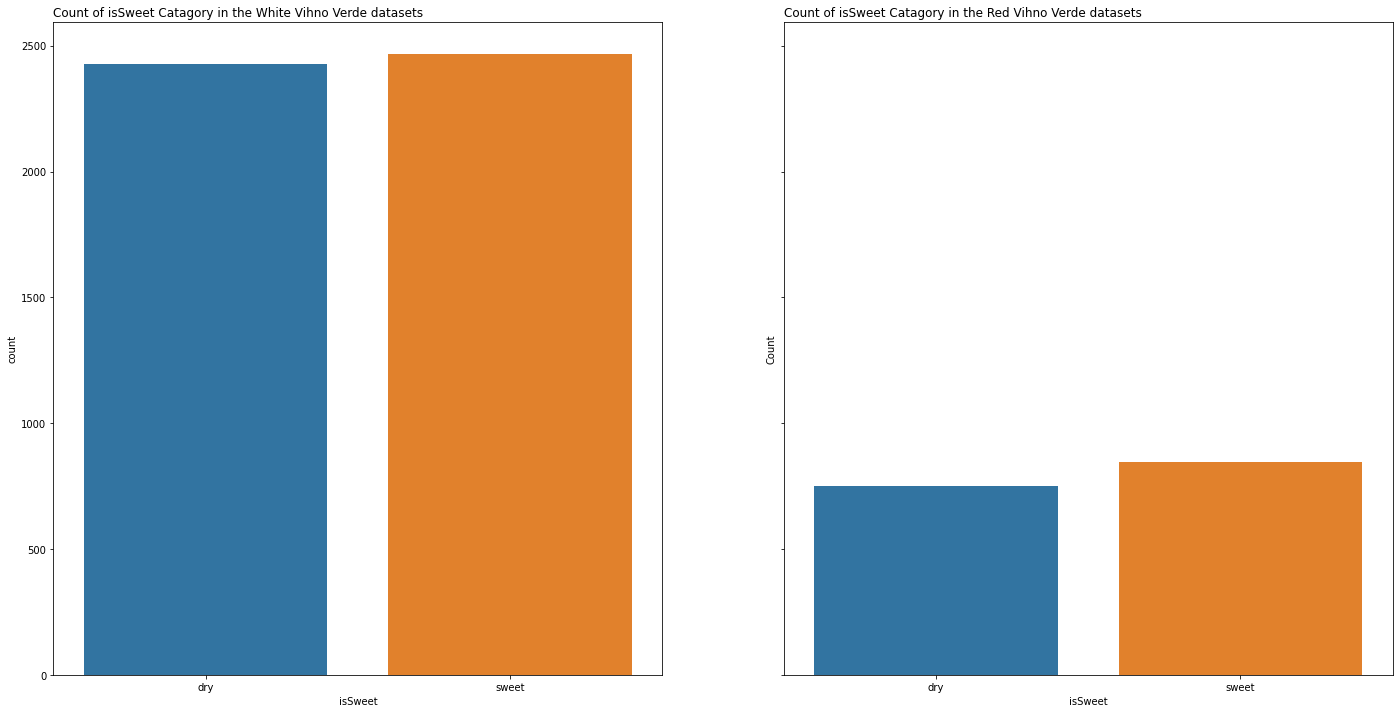

In [49]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2, sharex=True, sharey=True)

ax1.set_title("Count of isSweet Catagory in the White Vihno Verde datasets", loc='left')
ax2.set_title("Count of isSweet Catagory in the Red Vihno Verde datasets", loc='left')

sns.countplot(data=white_vihno_dataset, x="isSweet", ax=ax1)
sns.countplot(data=red_vihno_dataset, x="isSweet", ax=ax2)

plt.xlabel("isSweet")
plt.ylabel("Count")
plt.show()
plt.close()

Used a scatter graph to show that the dry to sweet distribution is similar 

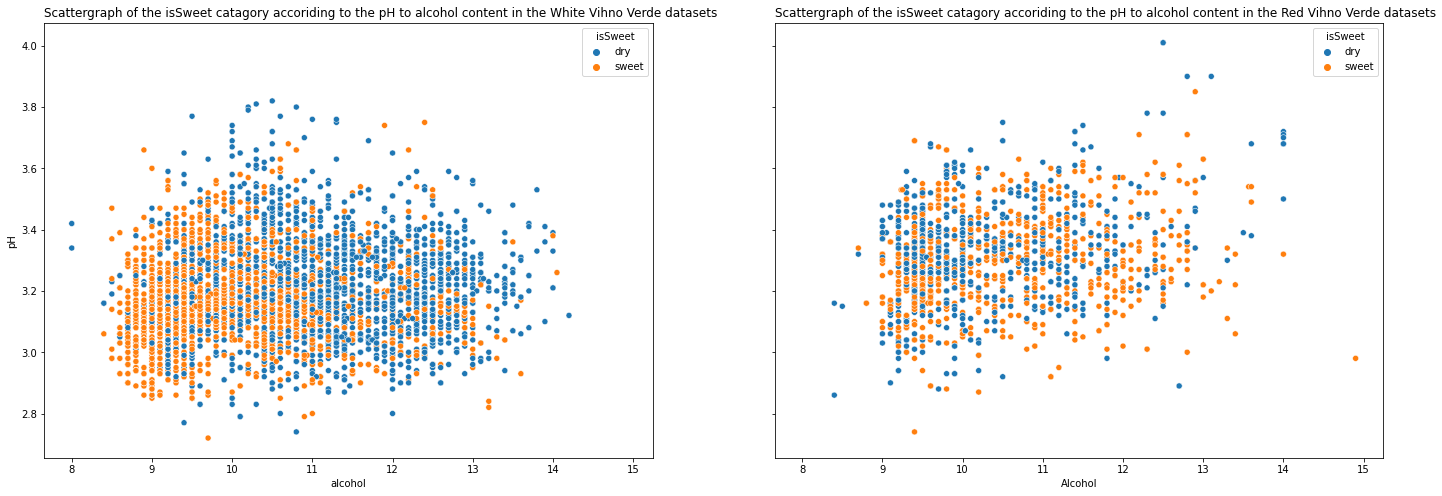

In [50]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2, sharex=True, sharey=True)

ax1.set_title("Scattergraph of the isSweet catagory accoriding to the pH to alcohol content in the White Vihno Verde datasets", loc='left')
ax2.set_title("Scattergraph of the isSweet catagory accoriding to the pH to alcohol content in the Red Vihno Verde datasets", loc='left')

sns.scatterplot(data=white_vihno_dataset, x='alcohol', y='pH', hue='isSweet', ax=ax1, hue_order=['dry', 'sweet'])
sns.scatterplot(data=red_vihno_dataset, x='alcohol', y='pH', hue='isSweet', ax=ax2, hue_order=['dry', 'sweet'])

plt.xlabel("Alcohol")
plt.ylabel("pH")
plt.show()
plt.close()

### 1) E


*   Using the threshold from (1.D), repeat the distribution analysis of quality vs isSweet.
*    Are sweet wines perceived as lower or higher quality than dry wines? (NEED TO DO)



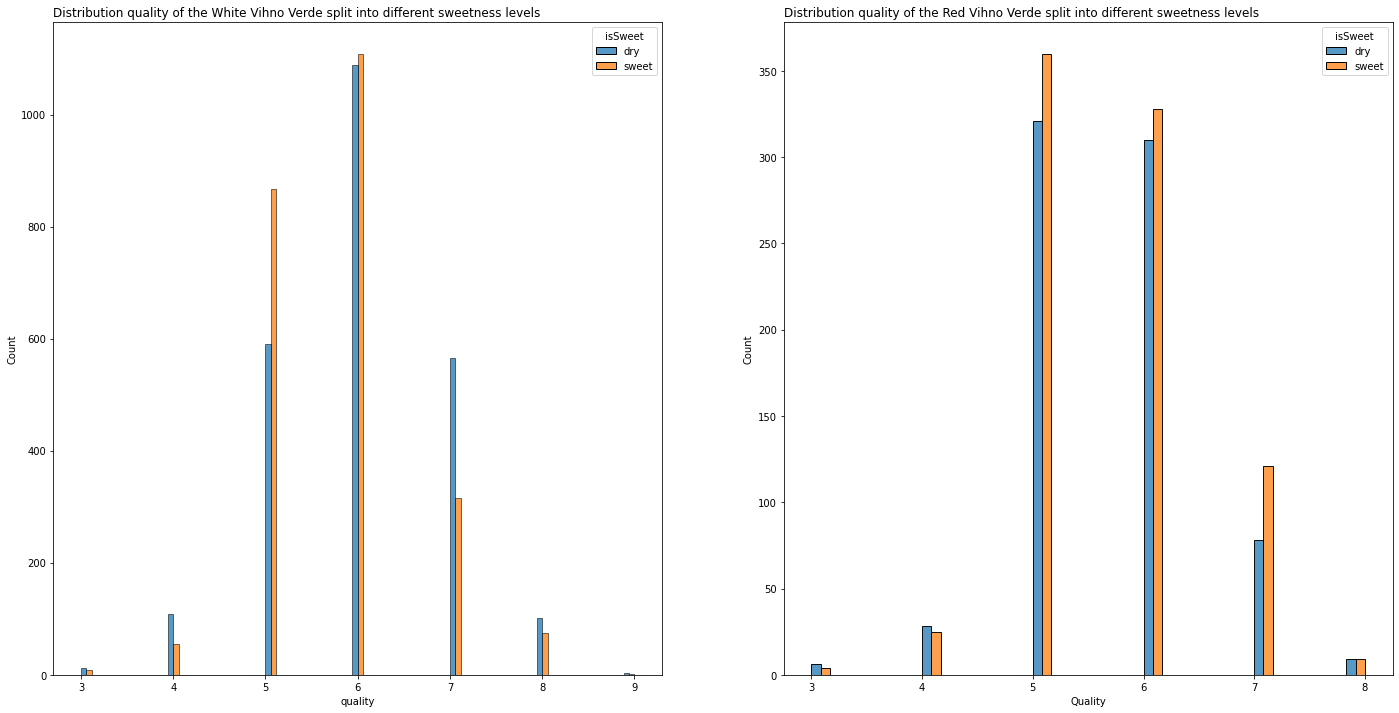

In [47]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Distribution quality of the White Vihno Verde split into different sweetness levels", loc='left') 
ax2.set_title("Distribution quality of the Red Vihno Verde split into different sweetness levels", loc='left') 

sns.histplot(data=white_vihno_dataset, x="quality", hue="isSweet", multiple="dodge", ax=ax1, hue_order=['dry', 'sweet'])
sns.histplot(data=red_vihno_dataset, x="quality", hue="isSweet", multiple="dodge", ax=ax2, hue_order=['dry', 'sweet'])

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

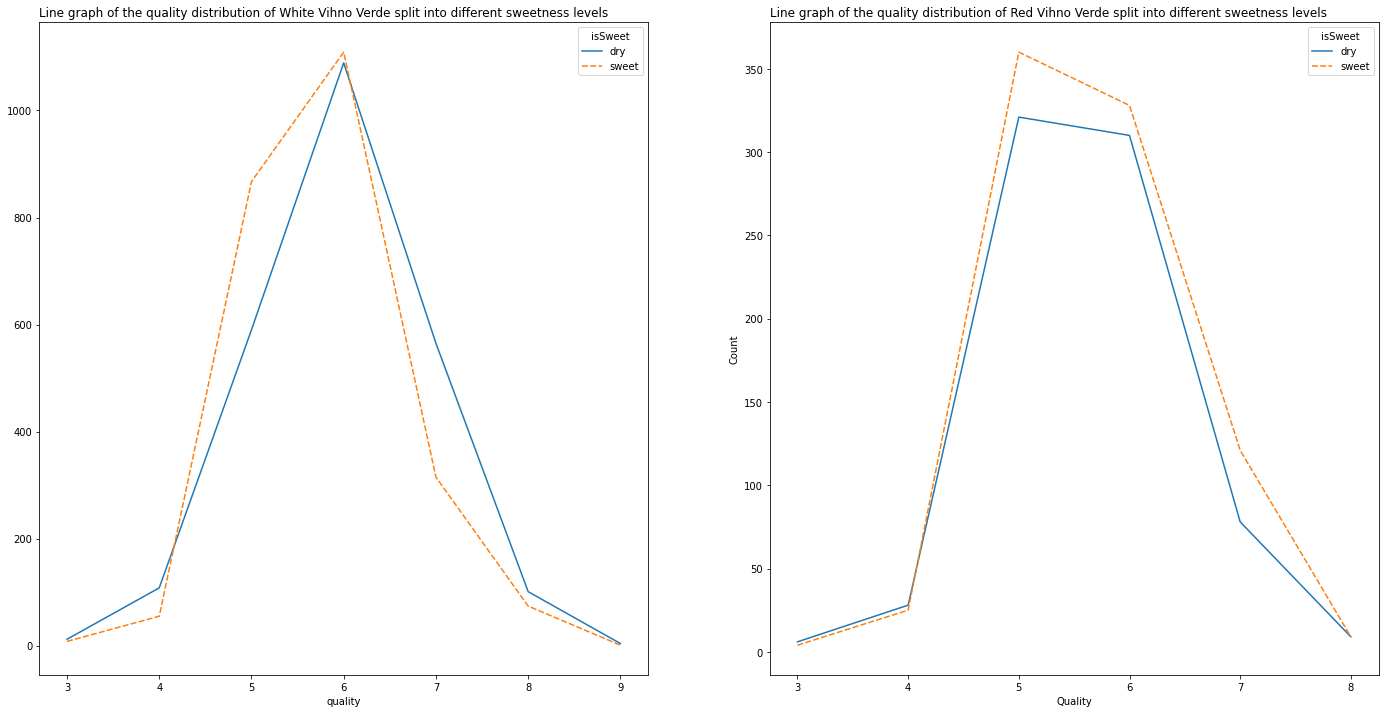

In [45]:
white_sub_dataset = white_vihno_dataset.pivot_table(index='quality', columns='isSweet', values='residual sugar', aggfunc='count')
red_sub_dataset = red_vihno_dataset.pivot_table(index='quality', columns='isSweet', values='residual sugar', aggfunc='count')

fig, (ax1, ax2) = plt.subplots(figsize=(24, 12), ncols=2)

ax1.set_title("Line graph of the quality distribution of White Vihno Verde split into different sweetness levels", loc='left')
ax2.set_title("Line graph of the quality distribution of Red Vihno Verde split into different sweetness levels", loc='left')


sns.lineplot(data=white_sub_dataset, ax=ax1)
sns.lineplot(data=red_sub_dataset, ax=ax2)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

##Determining most useful variables for machine learning module

In [33]:
display(red_vihno_dataset)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mid,dry
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,mid,sweet
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,mid,sweet
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,mid,dry
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,mid,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,mid,dry
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,mid,sweet
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,mid,sweet
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,mid,dry


Broke down the variables into 3 catagories acidity, viscousity and sulfur content for easier comparability of the variables

In [ ]:
acidity = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH']
viscousity = ['residual sugar', 'alcohol', 'density']
sulfur = ['free sulfur dioxide' , 'total sulfur dioxide', 'sulphates']

Correlation matrix for the acidity variables 

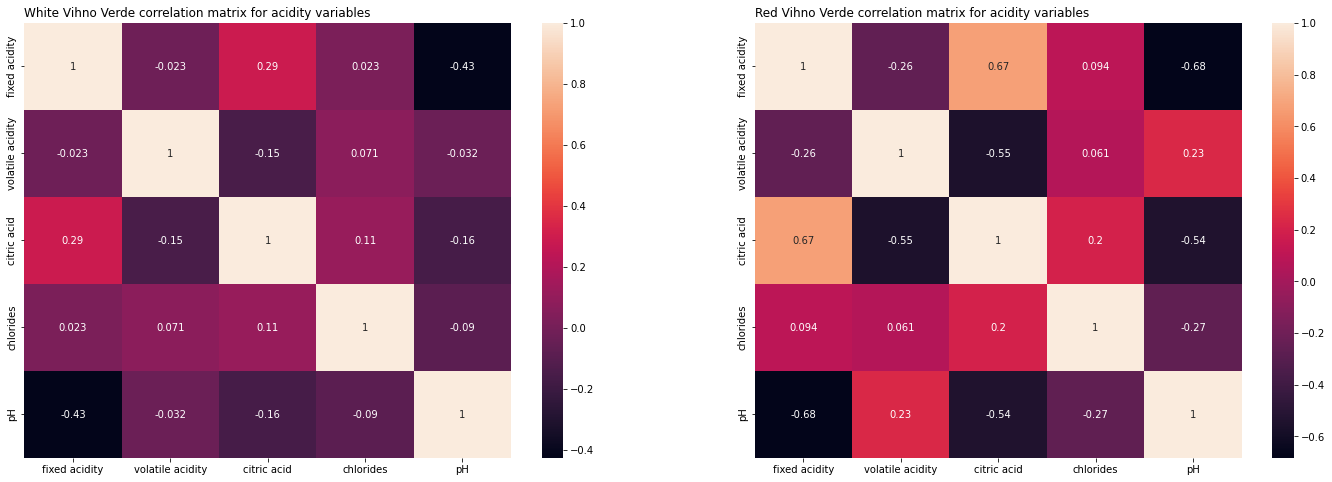

In [83]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=acidity)
red_df = pd.DataFrame(red_vihno_dataset, columns=acidity)

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for acidity variables", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for acidity variables", loc='left') 

plt.show()

**White Vihno Verde**
*   Moderate negative correlation between pH and fixed acidity
*   Slight positive correlation between citric acid and fixed acidity

**Red Vihno Verde**
*   Strong negative correlation between pH and fixed acidity
*   Strong positive correlation between citric acid and fixed acidity
*   Moderate positive correlation between citric acid and volatile acidity
*   Moderate negative correlation between pH and citric acid
*   Slight negative correlation between pH and chlorides
*   Slight negative correlation between fixed acidity and volatile acidity


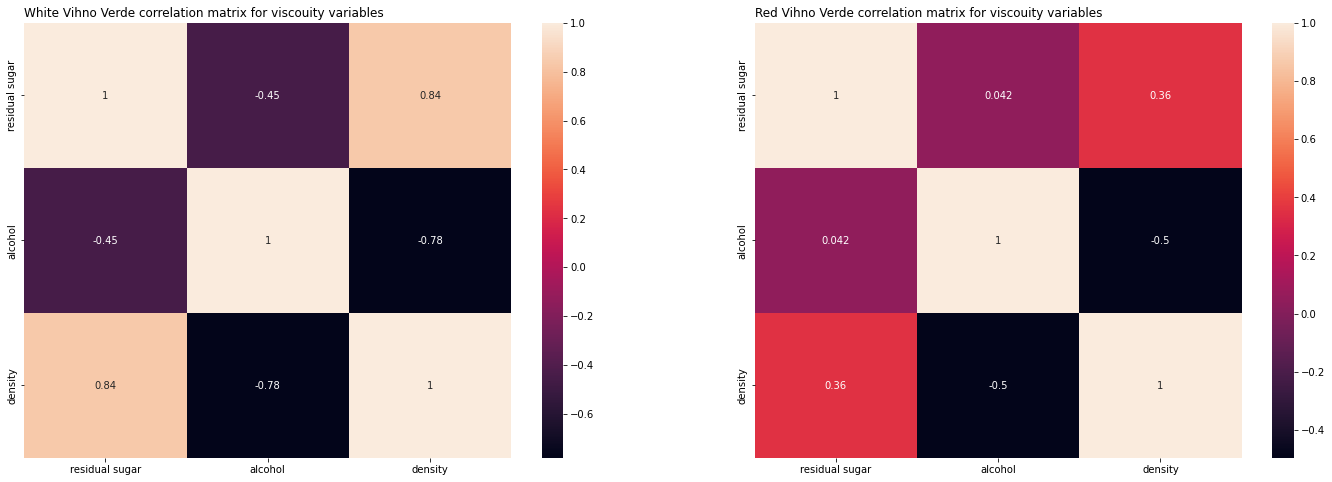

In [81]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=viscousity)
red_df = pd.DataFrame(red_vihno_dataset, columns=viscousity)

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for viscouity variables", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for viscouity variables", loc='left') 

plt.show()

**White Vihno Verde**
*   Strong positive correlation between density and residual sugar content
*   Strong negative correlation between alcohol and density
*   Moderate negaitve correlation between alcohol and residual sugar content

**Red Vihno Verde**
*   Slight positive correlation between density and residual sugar content
*   Moderate negative correlation between alcohol and density





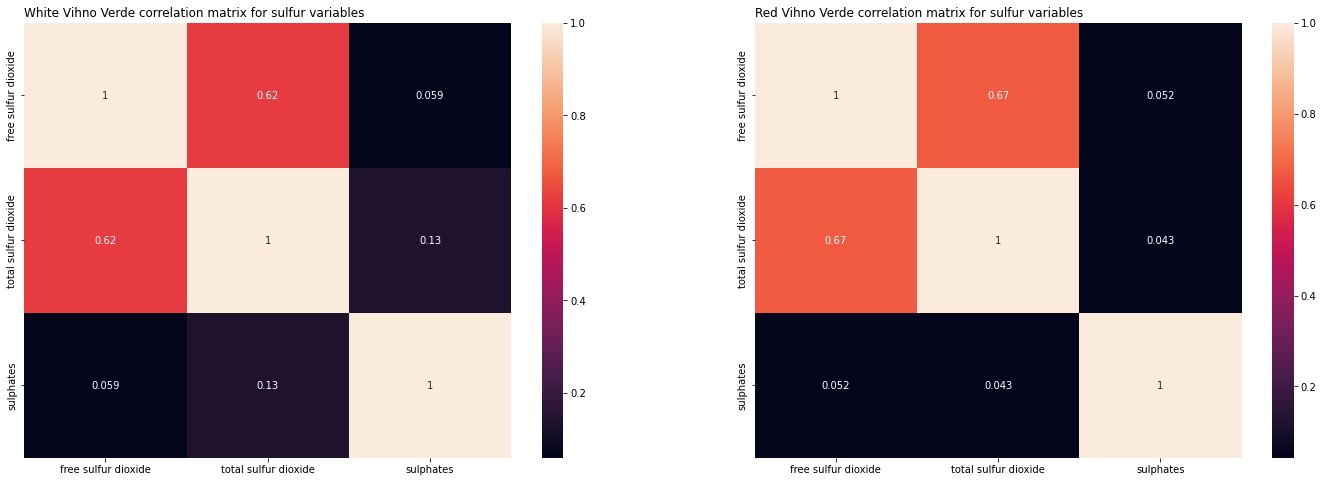

In [65]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=sulfur)
red_df = pd.DataFrame(red_vihno_dataset, columns=sulfur)

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for sulfur variables", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for sulfur variables", loc='left') 

plt.show()

**White Vihno Verde**
*   Moderate positive correlation betwwen total sulfur dixoide and free sulfur 
dioxide

**Red Vihno Verde**
*   Moderate positive correlation betwwen total sulfur dixoide and free sulfur dioxide



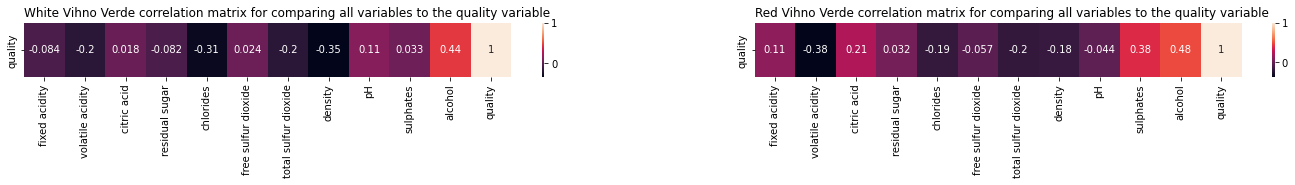

In [127]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 1), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
red_df = pd.DataFrame(red_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])

white_corr_matrix = white_df.corr(method='spearman')
red_corr_matrix = red_df.corr(method='spearman')

sns.heatmap(white_corr_matrix.iloc[[11]], annot=True, ax=ax1)
sns.heatmap(red_corr_matrix.iloc[[11]], annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left')

plt.show()

**Main Variables when Compared to Quality**

*For White Vihno Verde:*
*   Alcohol
*   Density
*   Chlorides

*For Red Vihno Verde:*
*   Alcohol
*   Sulphates
*   Volatile acidity





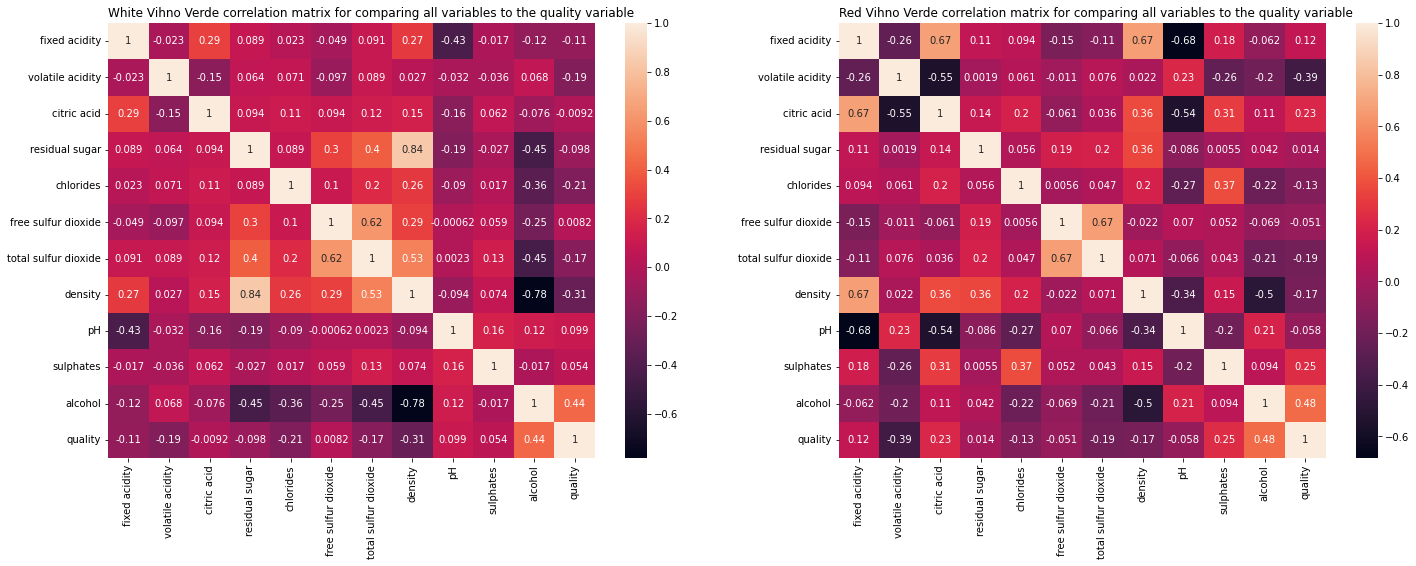

In [129]:
fig, (ax1, ax2) = plt.subplots(figsize=(24, 8), ncols=2)

white_df = pd.DataFrame(white_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
red_df = pd.DataFrame(red_vihno_dataset, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])

white_corr_matrix = white_df.corr()
red_corr_matrix = red_df.corr()

sns.heatmap(white_corr_matrix, annot=True, ax=ax1)
sns.heatmap(red_corr_matrix, annot=True, ax=ax2)

ax1.set_title("White Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left') 
ax2.set_title("Red Vihno Verde correlation matrix for comparing all variables to the quality variable", loc='left')

plt.show()